<a href="https://colab.research.google.com/github/GabyPaolaING/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

##2.1 Fundamentos de la técnica

La Regresión Lineal Simple es una técnica estadística que modela la relación entre una variable independiente
𝑋
X y una variable dependiente
𝑌
Y. Su objetivo es encontrar la mejor línea recta que minimice la diferencia (error) entre los valores observados y los valores predichos.

Se basa en el supuesto de que existe una relación lineal entre ambas variables, y se utiliza ampliamente en predicciones y análisis de tendencias.

## 2.2 Modelo Matemático

La Regresión Lineal Simple busca modelar la relación entre una variable independiente
𝑋
X y una variable dependiente
𝑌
Y mediante una ecuación lineal:

          𝑌 = 𝛽0 + 𝛽1𝑋 + 𝜖

Donde:


*   Y: Variable dependiente.
*   X: Variable independiente.
*   𝛽0: Intercepto( valor de Y cuando x=0).
*  𝛽1: Pendiente de la recta(cambio en Y por unidad de cambio en X).
* 𝜖: Error o termino de perturbacion




## 2.3 Descripción de la librería, clases y funciones empleadas

El artículo utiliza principalmente las siguientes librerías:

pandas → para manipulación de datos (read_csv(), DataFrame)

matplotlib.pyplot → para visualización (scatter(), plot())

scikit-learn (sklearn) → para crear y entrenar el modelo:

LinearRegression() → clase que implementa el modelo lineal.

fit(X, y) → ajusta el modelo a los datos.

predict(X) → realiza predicciones.

score(X, y)` → obtiene el coeficiente de determinación \( R^2 \).


## 2.4 Pipeline

## Preprocesamiento

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


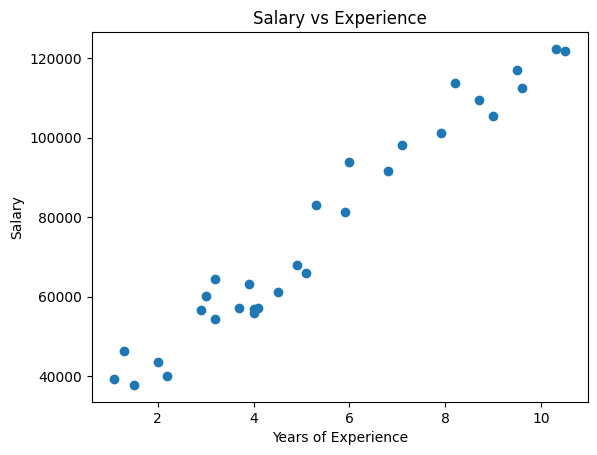

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset (ejemplo usado en el artículo)
dataset = pd.read_csv('/Salary_Data.csv')

# Visualización inicial
print(dataset.head())

# Gráfico de dispersión
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


## Feature Engineering

En este modelo, la variable independiente (X) es YearsExperience
y la variable dependiente (y) es Salary.

In [3]:
X = dataset[['YearsExperience']]  # Variable independiente
y = dataset['Salary']             # Variable dependiente


## Model Selection

El artículo usa Regresión Lineal Simple porque los datos muestran una tendencia aproximadamente lineal entre los años de experiencia y el salario.

No se utiliza un modelo no lineal (como polinomial), ya que no hay evidencia de una curva significativa en los datos.
El modelo lineal es suficiente para capturar la relación.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercepto (β0):", model.intercept_)
print("Pendiente (β1):", model.coef_)


Intercepto (β0): 26816.192244031183
Pendiente (β1): [9345.94244312]


##Prediction

      Actual      Predicted
2    37731.0   40835.105909
28  122391.0  123079.399408
13   57081.0   65134.556261
10   63218.0   63265.367772
26  116969.0  115602.645454


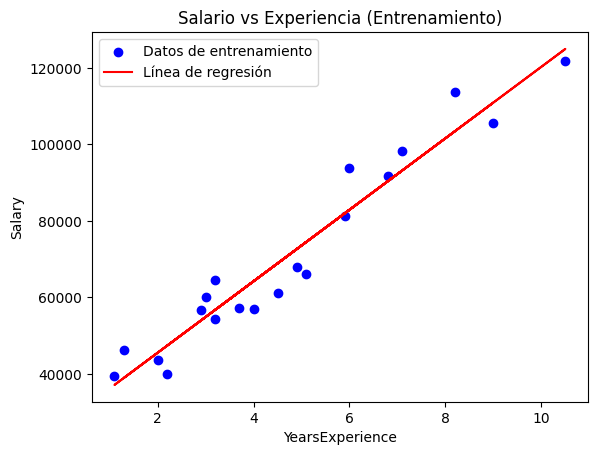

In [5]:
# Predicciones
y_pred = model.predict(X_test)

# Comparar valores reales vs predichos
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

# Gráfico de resultados
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train, model.predict(X_train), color='red', label='Línea de regresión')
plt.title('Salario vs Experiencia (Entrenamiento)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()


## Model Evaluation

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


Error Cuadrático Medio (MSE): 21026037.33
Coeficiente de Determinación (R²): 0.97


https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8